## Automating Crypto Website Using its API

In [22]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'http://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
# Original Sandbox Environment : 'http://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
    'start' : '1',
    'limit' : '15',
    'convert': 'USD'
}
headers = {
    'Accepts': 'applications/json',
    'X-CMC_PRO_API_KEY': 'USE-YOUR-API-KEY',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url,params = parameters)
    data = json.loads(response.text)
    #print(data)
except (ConnectionError, Timeout, Toomanyredirects) as e:
    print(e)
    
    
#Note:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using local host URL

In [23]:
type(data)

dict

In [36]:
import pandas as pd
#This allows you to see all the columns , not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [25]:
# this normalize the data and make it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

/var/folders/2c/hpk9j8md6h71406dzkc5_w1m0000gn/T/ipykernel_75661/2625892625.py:3: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10834,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.963931e+07,1.963931e+07,False,NaN,1,NaN,NaN,None,2024-02-27T18:20:00.000Z,57029.269398,5.261897e+10,98.1618,-0.302457,6.547582,11.189540,35.589700,35.977142,51.016454,1.120016e+12,52.2499,1.197615e+12,None,2024-02-27T18:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-27 18:20:50.162753
1,1027,Ethereum,ETH,ethereum,8463,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201536e+08,1.201536e+08,True,NaN,2,NaN,NaN,None,2024-02-27T18:20:00.000Z,3235.113995,2.208892e+10,30.3513,-0.268101,2.694281,11.122289,42.869123,40.259775,59.078007,3.887107e+11,18.1524,3.887107e+11,None,2024-02-27T18:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-27 18:20:50.162753
2,825,Tether USDt,USDT,tether,76317,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.806357e+10,1.016001e+11,True,NaN,3,NaN,NaN,None,2024-02-27T18:19:00.000Z,1.000165,8.457323e+10,54.3390,-0.021611,-0.006005,0.016608,0.006941,-0.011552,0.006975,9.807971e+10,4.5802,1.016168e+11,None,2024-02-27T18:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-27 18:20:50.162753
3,1839,BNB,BNB,bnb,2078,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495428e+08,1.495428e+08,False,NaN,4,NaN,NaN,None,2024-02-27T18:19:00.000Z,394.461767,1.922049e+09,1.8516,-0.226159,-0.774096,13.102631,29.117455,26.110892,73.533928,5.898892e+10,2.7545,5.898892e+10,None,2024-02-27T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-27 18:20:50.162753
4,5426,Solana,SOL,solana,628,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.423215e+08,5.705423e+08,True,NaN,5,NaN,NaN,None,2024-02-27T18:20:00.000Z,107.620305,3.019289e+09,61.3017,0.199744,-1.787449,2.137358,12.480900,1.637142,80.235281,4.760278e+10,2.2230,6.140193e+10,None,2024-02-27T18:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-27 18:20:50.162753
5,52,XRP,XRP,xrp,1236,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.459425e+10,9.998787e+10,False,NaN,6,NaN,NaN,None,2024-02-27T18:20:00.000Z,0.572828,1.894093e+09,76.3889,0.670276,4.609531,3.457039,8.256044,-7.747145,-5.753875,3.127312e+10,1.4589,5.728281e+10,None,2024-02-27T18:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-27 18:20:50.162753
6,3408,USDC,USDC,usd-coin,16904,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.847604e+10,2.847604e+10,False,NaN,7,NaN,NaN,None,2024-02-27T18:20:00.000Z,0.999927,8.672183e+09,50.4773,-0.004069,-0.002323,0.059366,-0.020639,-0.023694,0.007227,2.847395e+10,1.3283,2.847395e+10,None,2024-02-27T18:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-27 18:20:50.162753
7,2010,Cardano,ADA,cardano,1084,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.547327e+10,3.665692e+10,False,NaN,8,NaN,NaN,None,2024-02-27T18:19:00.000Z,0.614567,7.369285e+08,42.0861,-0.295471,0.588540,2.217029,25.481940,1.696859,59.398462,2.180071e+10,1.0175,2.765553e+10,None,2024-02-27T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-27 18:20:50.162753
8,5805,Avalanche,AVAX,avalanche,672,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.20000

In [42]:
def api_runner():
    global df
    url = 'http://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
# Original Sandbox Environment : 'http://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start' : '1',
        'limit' : '15',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'applications/json',
        'X-CMC_PRO_API_KEY': 'db31d00d-5d0c-4d7e-800d-89fc16f02420',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url,params = parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, Toomanyredirects) as e:
        print(e)
    
    
#Note:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df  

    if not os.path.isfile(r'/Users/saqib/Downloads/python tutorial/excel files/API.csv'):
        df.to_csv(r'/Users/saqib/Downloads/python tutorial/excel files/API.csv', header ='column_names')
    else:
        df.to_csv(r'/Users/saqib/Downloads/python tutorial/excel files/API.csv', mode = 'a', header = False)
        


# If that didn't work try using local host URL

In [43]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed Successfully')
    sleep(60) #sleep for 1 minute
exit()

/var/folders/2c/hpk9j8md6h71406dzkc5_w1m0000gn/T/ipykernel_75661/4179252712.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner Completed Successfully


/var/folders/2c/hpk9j8md6h71406dzkc5_w1m0000gn/T/ipykernel_75661/4179252712.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner Completed Successfully


KeyboardInterrupt: 

In [44]:
dfcheck = pd.read_csv(r'/Users/saqib/Downloads/python tutorial/excel files/API.csv')

In [45]:
dfcheck

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10835,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.963976e+07,1.963976e+07,False,NaN,1,NaN,NaN,NaN,2024-02-28T08:01:00.000Z,58320.860758,4.054749e+10,-15.7630,1.907883,3.790784,13.136254,38.678118,38.638054,54.270216,1.145407e+12,52.4293,1.224738e+12,NaN,2024-02-28T08:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 08:01:57.417013
1,1,1027,Ethereum,ETH,ethereum,8470,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201510e+08,1.201510e+08,True,NaN,2,NaN,NaN,NaN,2024-02-28T08:01:00.000Z,3303.643409,1.704843e+10,-23.3939,1.298183,2.571954,12.492869,46.155225,43.379717,62.254770,3.969360e+11,18.1732,3.969360e+11,NaN,2024-02-28T08:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 08:01:57.417013
2,2,825,Tether USDt,USDT,tether,76346,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,9.839094e+10,1.016001e+11,True,NaN,3,NaN,NaN,NaN,2024-02-28T08:00:00.000Z,1.000607,6.885070e+10,-15.0872,0.003675,0.013732,0.074245,0.060377,0.024886,0.044318,9.845067e+10,4.5074,1.016618e+11,NaN,2024-02-28T08:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-28 08:01:57.417013
3,3,1839,BNB,BNB,bnb,2078,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.495427e+08,1.495427e+08,False,NaN,4,NaN,NaN,NaN,2024-02-28T08:00:00.000Z,400.746439,1.436768e+09,-35.8841,0.740847,1.121583,11.473242,30.969878,25.980463,75.955056,5.992871e+10,2.7420,5.992871e+10,NaN,2024-02-28T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 08:01:57.417013
4,4,5426,Solana,SOL,solana,628,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.424779e+08,5.705415e+08,True,NaN,5,NaN,NaN,NaN,2024-02-28T08:01:00.000Z,110.141192,2.189476e+09,-27.1911,1.218187,-0.413318,5.080162,13.821904,5.303161,83.579847,4.873504e+10,2.2320,6.284012e+10,NaN,2024-02-28T08:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 08:01:57.417013
5,5,52,XRP,XRP,xrp,1236,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.459425e+10,9.998787e+10,False,NaN,6,NaN,NaN,NaN,2024-02-28T08:01:00.000Z,0.583520,2.381837e+09,60.8942,0.782987,5.630184,6.684504,11.155484,-6.682669,-3.455055,3.185682e+10,1.4590,5.835196e+10,NaN,2024-02-28T08:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 08:01:57.417013
6,6,3408,USDC,USDC,usd-coin,16914,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.852470e+10,2.852470e+10,False,NaN,7,NaN,NaN,NaN,2024-02-28T08:01:00.000Z,0.999831,6.959636e+09,-19.5853,-0.015445,0.015126,-0.021285,-0.043024,-0.030564,-0.008607,2.851989e+10,1.3062,2.851989e+10,NaN,2024-02-28T08:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-28 08:01:57.417013
7,7,2010,Cardano,ADA,cardano,1085,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.547527e+10,3.665692e+10,False,NaN,8,NaN,NaN,NaN,2024-02-28T08:00:00.000Z,0.627050,6.267666e+08,-15.7393,1.268534,1.760374,5.523989,28.556828,3.257357,66.327165,2.224477e+10,1.0182,2.821725e+10,NaN,2024-02-28T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 08:01:57.417013
8,8,5805,Avalanche,AVAX,avalanche,673,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-c

In [46]:
pd.set_option('display.float_format',lambda x:'%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10835,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19639756.00000,19639756.00000,False,NaN,1,NaN,NaN,None,2024-02-28T08:02:00.000Z,58348.93453,40530697183.03295,-15.81180,1.96922,3.80588,13.21367,38.71185,38.71222,54.32049,1145958837047.88989,52.45450,1225327625150.01001,None,2024-02-28T08:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 08:02:58.870635
1,1027,Ethereum,ETH,ethereum,8470,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120150997.07234,120150997.07234,True,NaN,2,NaN,NaN,None,2024-02-28T08:02:00.000Z,3303.77263,17033182973.99915,-23.45240,1.31585,2.53277,12.53448,46.17586,43.37591,62.23876,396951575537.62866,18.17790,396951575537.63000,None,2024-02-28T08:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 08:02:58.870635
2,825,Tether USDt,USDT,tether,76347,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,98390937373.99667,101600078701.91357,True,NaN,3,NaN,NaN,None,2024-02-28T08:01:00.000Z,1.00044,68928431020.40401,-15.00410,-0.01588,0.02147,0.04213,0.05698,0.02380,0.04059,98434276307.00031,4.50670,101644831187.47000,None,2024-02-28T08:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-28 08:02:58.870635
3,1839,BNB,BNB,bnb,2078,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149542714.13620,149542714.13620,False,NaN,4,NaN,NaN,None,2024-02-28T08:01:00.000Z,400.69834,1433472025.58174,-36.04200,0.66224,1.13702,11.28618,30.95775,25.90447,75.89425,59921517485.41835,2.74170,59921517485.42000,None,2024-02-28T08:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 08:02:58.870635
4,5426,Solana,SOL,solana,628,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,442477906.82761,570541461.25835,True,NaN,5,NaN,NaN,None,2024-02-28T08:02:00.000Z,110.21336,2189028503.38056,-27.17710,1.28063,-0.35976,5.15043,13.91899,5.34799,83.67160,48766977972.08998,2.23350,62881292927.90000,None,2024-02-28T08:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 08:02:58.870635
5,52,XRP,XRP,xrp,1236,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54594247369.00000,99987873963.00000,False,NaN,6,NaN,NaN,None,2024-02-28T08:02:00.000Z,0.58351,2380063883.88431,60.81870,0.78295,5.63992,6.68248,11.16187,-6.68957,-3.45946,31856228274.04590,1.45900,58350888251.52000,None,2024-02-28T08:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 08:02:58.870635
6,3408,USDC,USDC,usd-coin,16914,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28524704690.89853,28524704690.89853,False,NaN,7,NaN,NaN,None,2024-02-28T08:02:00.000Z,0.99978,6959515977.06468,-19.55900,-0.02203,0.00309,-0.02532,-0.03100,-0.04154,-0.00761,28518358328.12125,1.30610,28518358328.12000,None,2024-02-28T08:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-28 08:02:58.870635
7,2010,Cardano,ADA,cardano,1085,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35475266384.90500,36656916043.87500,False,NaN,8,NaN,NaN,None,2024-02-28T08:01:00.000Z,0.62774,625017928.84723,-16.00790,1.37338,1.88329,5.59104,28.70392,3.30352,66.44650,22269227966.37902,1.01930,28248280016.11000,None,2024-02-28T08:01:00.000Z

In [48]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,1.96922,3.80588,13.21367,38.71185,38.71222,54.32049
Ethereum,1.31585,2.53277,12.53448,46.17586,43.37591,62.23876
Tether USDt,-0.01588,0.02147,0.04213,0.05698,0.02380,0.04059
BNB,0.66224,1.13702,11.28618,30.95775,25.90447,75.89425
Solana,1.28063,-0.35976,5.15043,13.91899,5.34799,83.67160
XRP,0.78295,5.63992,6.68248,11.16187,-6.68957,-3.45946
USDC,-0.02203,0.00309,-0.02532,-0.03100,-0.04154,-0.00761
Cardano,1.37338,1.88329,5.59104,28.70392,3.30352,66.44650
Avalanche,1.19367,1.64621,6.47985,14.03627,0.29617,88.92739


In [49]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      1.96922
             quote.USD.percent_change_24h     3.80588
             quote.USD.percent_change_7d     13.21367
             quote.USD.percent_change_30d    38.71185
             quote.USD.percent_change_60d    38.71222
             quote.USD.percent_change_90d    54.32049
Ethereum     quote.USD.percent_change_1h      1.31585
             quote.USD.percent_change_24h     2.53277
             quote.USD.percent_change_7d     12.53448
             quote.USD.percent_change_30d    46.17586
             quote.USD.percent_change_60d    43.37591
             quote.USD.percent_change_90d    62.23876
Tether USDt  quote.USD.percent_change_1h     -0.01588
             quote.USD.percent_change_24h     0.02147
             quote.USD.percent_change_7d      0.04213
             quote.USD.percent_change_30d     0.05698
             quote.USD.percent_change_60d     0.02380
             quote.USD.percent_change_90

In [51]:
df5= df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    1.96922
            quote.USD.percent_change_24h   3.80588
            quote.USD.percent_change_7d   13.21367
            quote.USD.percent_change_30d  38.71185
            quote.USD.percent_change_60d  38.71222
            quote.USD.percent_change_90d  54.32049
Ethereum    quote.USD.percent_change_1h    1.31585
            quote.USD.percent_change_24h   2.53277
            quote.USD.percent_change_7d   12.53448
            quote.USD.percent_change_30d  46.17586
            quote.USD.percent_change_60d  43.37591
            quote.USD.percent_change_90d  62.23876
Tether USDt quote.USD.percent_change_1h   -0.01588
            quote.USD.percent_change_24h   0.02147
            quote.USD.percent_change_7d    0.04213
            quote.USD.percent_change_30d   0.05698
            quote.USD.percent_change_60d   0.02380
            quote.USD.percent_change_90d   0.04059
BNB         quote.USD.percent_change_1h    0.66224
            quote.USD.percent_change_24h   1.13702
            quote.USD.percent_change_7d   11.28618
            quote.USD.percent_change_30d  30.95775
            quote.USD.percent_change_60d  25.90447
            quote.USD.percent_change_90d  75.89425
Solana      quote.USD.percent_change_1h    1.28063
            quote.USD.percent_change_24h  -0.35976
            quote.USD.percent_change_7d    5.15043
            quote.USD.percent_change_30d  13.91899
            quote.USD.percent_change_60d   5.34799
            quote.USD.percent_change_90d  83.67160
XRP         quote.USD.percent_change_1h    0.78295
            quote.USD.percent_change_24h   5.63992
            quote.USD.percent_change_7d    6.68248
            quote.USD.percent_change_30d  11.16187
            quote.USD.percent_change_60d  -6.68957
            quote.USD.percent_change_90d  -3.45946
USDC        quote.USD.percent_change_1h   -0.02203
            quote.USD.percent_change_24h   0.00309
            quote.USD.percent_change_7d   -0.02532
            quote.USD.percent_change_30d  -0.03100
            quote.USD.percent_change_60d  -0.04154
            quote.USD.percent_change_90d  -0.00761
Cardano     quote.USD.percent_change_1h    1.37338
            quote.USD.percent_change_24h   1.88329
            quote.USD.percent_change_7d    5.59104
            quote.USD.percent_change_30d  28.70392
            quote.USD.percent_change_60d   3.30352
            quote.USD.percent_change_90d  66.44650
Avalanche   quote.USD.percent_change_1h    1.19367
            quote.USD.percent_change_24h   1.64621
            quote.USD.percent_change_7d    6.47985
            quote.USD.percent_change_30d  14.03627
            quote.USD.percent_change_60d   0.29617
            quote.USD.percent_change_90d  88.92739
Dogecoin    quote.USD.percent_change_1h    1.96766
            quote.USD.percent_change_24h   5.65742
            quote.USD.percent_change_7d   15.01571
            quote.USD.percent_change_30d  23.48594
            quote.USD.percent_change_60d   6.75494
            quote.USD.percent_change_90d  18.76080
TRON        quote.USD.percent_change_1h   -0.14072
            quote.USD.percent_change_24h   1.56234
            quote.USD.percent_change_7d    2.06257
            quote.USD.percent_change_30d  26.19109
            quote.USD.percent_change_60d  34.20353
            quote.USD.percent_change_90d  38.37336
Chainlink   quote.USD.percent_change_1h    0.91533
            quote.USD.percent_change_24h   0.64635
            quote.USD.percent_change_7d    2.14942
            quote.USD.percent_change_30d  31.11867
            quote.USD.percent_change_60d  24.19773
            quote.USD.percent_change_90d  32.48348
Polkadot    quote.USD.percent_change_1h    1.36744
            quote.USD.percent_change_24h   3.89043
            quote.USD.percent_change_7d   12.68042
            quote.USD.percent_change_30d  22.70831
            quote.USD.percent_change_60d  -0.61529
            quo

In [52]:
df5.count()

values    90
dtype: int64

In [59]:
index = pd.Index(range(90))
# df6 = df5.set_index(index)
# df6 = df5.reset_index() after setting index
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,1.96922
1,Bitcoin,quote.USD.percent_change_24h,3.80588
2,Bitcoin,quote.USD.percent_change_7d,13.21367
3,Bitcoin,quote.USD.percent_change_30d,38.71185
4,Bitcoin,quote.USD.percent_change_60d,38.71222
5,Bitcoin,quote.USD.percent_change_90d,54.32049
6,Ethereum,quote.USD.percent_change_1h,1.31585
7,Ethereum,quote.USD.percent_change_24h,2.53277
8,Ethereum,quote.USD.percent_change_7d,12.53448
9,Ethereum,quote.USD.percent_change_30d,46.17586


In [62]:
df7= df6.rename(columns = {'level_1': 'percentage_change'})

In [63]:
df7

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,1.96922
1,Bitcoin,quote.USD.percent_change_24h,3.80588
2,Bitcoin,quote.USD.percent_change_7d,13.21367
3,Bitcoin,quote.USD.percent_change_30d,38.71185
4,Bitcoin,quote.USD.percent_change_60d,38.71222
5,Bitcoin,quote.USD.percent_change_90d,54.32049
6,Ethereum,quote.USD.percent_change_1h,1.31585
7,Ethereum,quote.USD.percent_change_24h,2.53277
8,Ethereum,quote.USD.percent_change_7d,12.53448
9,Ethereum,quote.USD.percent_change_30d,46.17586


In [69]:
df7['percentage_change']= df7['percentage_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24hr','7d','30d','60d','90d'])

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df7

,name,percentage_change,values
0,Bitcoin,1hr,1.96922
1,Bitcoin,24hr,3.80588
2,Bitcoin,7d,13.21367
3,Bitcoin,30d,38.71185
4,Bitcoin,60d,38.71222
5,Bitcoin,90d,54.32049
6,Ethereum,1hr,1.31585
7,Ethereum,24hr,2.53277
8,Ethereum,7d,12.53448
9,Ethereum,30d,46.17586


/Users/saqib/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


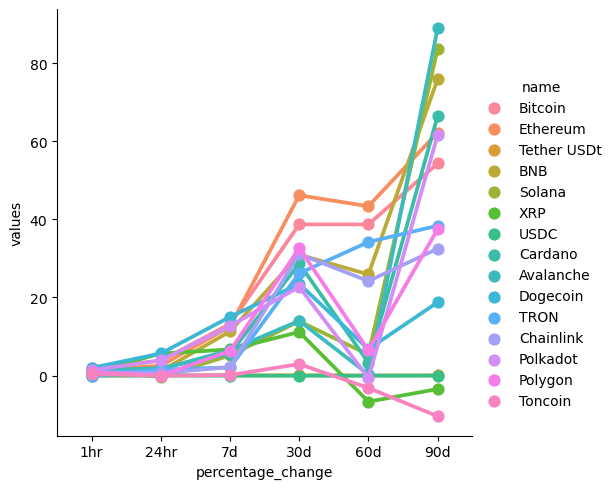

In [71]:
sns.catplot(x='percentage_change', y = 'values',hue= 'name',data= df7,kind = 'point')

In [76]:
df8=dfcheck[['name', 'quote.USD.price','timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,58320.86076,2024-02-28 08:01:57.417013
15,Bitcoin,58348.93453,2024-02-28 08:02:58.870635


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

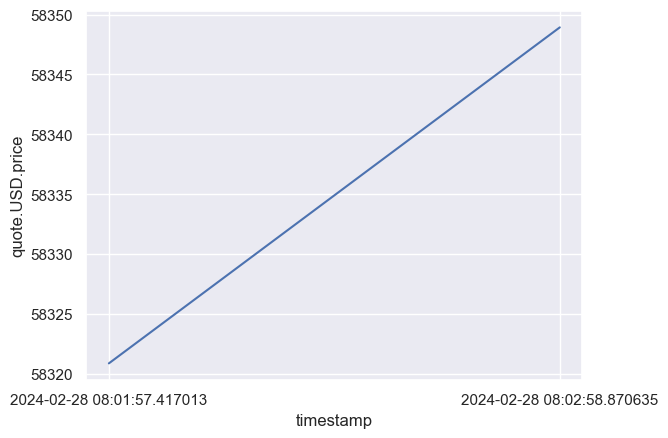

In [82]:
sns.set_theme(style='darkgrid')
sns.lineplot(x = 'timestamp', y= 'quote.USD.price', data= df8)